In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten, BatchNormalization, Activation
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image as img

In [2]:
!tar -xvzf crop_part1.tar.gz

Streaming output truncated to the last 5000 lines.
crop_part1/14_0_0_20170110224441502.jpg.chip.jpg
crop_part1/62_0_2_20170104212649180.jpg.chip.jpg
crop_part1/24_1_3_20170104222905601.jpg.chip.jpg
crop_part1/43_0_1_20170104185752431.jpg.chip.jpg
crop_part1/18_1_4_20170103222943622.jpg.chip.jpg
crop_part1/29_1_4_20170103230119816.jpg.chip.jpg
crop_part1/1_0_2_20161219212648582.jpg.chip.jpg
crop_part1/2_0_2_20161219222111287.jpg.chip.jpg
crop_part1/65_0_0_20170111203730182.jpg.chip.jpg
crop_part1/24_1_3_20170104222402975.jpg.chip.jpg
crop_part1/13_0_0_20170110225438328.jpg.chip.jpg
crop_part1/24_0_0_20170104165239658.jpg.chip.jpg
crop_part1/47_1_0_20170109132641773.jpg.chip.jpg
crop_part1/2_1_2_20161219162336446.jpg.chip.jpg
crop_part1/21_0_4_20161223214827816.jpg.chip.jpg
crop_part1/60_0_0_20170109013457906.jpg.chip.jpg
crop_part1/68_1_0_20170110175345439.jpg.chip.jpg
crop_part1/52_1_0_20170110143721250.jpg.chip.jpg
crop_part1/28_1_1_20170103225945785.jpg.chip.jpg
crop_part1/5_1_1_2016

In [10]:
content_data = []
data = []

In [11]:
import os
for i in os.listdir("/content/crop_part1"):
    content= i.split("_")
    if ((content[0].isnumeric()) and (content[1].isnumeric()) and (content[2].isnumeric())):
        content_data.append([content[0],content[1],content[2],os.path.join("/content/crop_part1/",i)])

In [12]:
data = pd.DataFrame(content_data,columns=["Age","Gender","Race","Filepath"])

In [13]:
data.head(10)

,Age,Gender,Race,Filepath
0,93,1,2,/content/crop_part1/93_1_2_20170110173119858.j...
1,58,0,0,/content/crop_part1/58_0_0_20170104211841244.j...
2,1,0,2,/content/crop_part1/1_0_2_20161219194716652.jp...
3,17,0,0,/content/crop_part1/17_0_0_20170110231535087.j...
4,2,0,2,/content/crop_part1/2_0_2_20161219161049398.jp...
5,1,0,3,/content/crop_part1/1_0_3_20161219225900970.jp...
6,66,0,0,/content/crop_part1/66_0_0_20170111203309589.j...
7,67,0,0,/content/crop_part1/67_0_0_20170109002906472.j...
8,3,0,0,/content/crop_part1/3_0_0_20170110212548876.jp...
9,55,1,0,/content/crop_part1/55_1_0_20170110160643422.j...


In [8]:
data["Race"] = data["Race"].replace({"0":"White","1":"Black","2":"Asian","3":"Indian","4":"Others"})
data["Gender"] = data["Gender"].replace({"0":"male","1":"female"})

In [38]:
data.head(10)

,Age,Gender,Race,Filepath
0,93,1,2,/content/crop_part1/93_1_2_20170110173119858.j...
1,58,0,0,/content/crop_part1/58_0_0_20170104211841244.j...
2,1,0,2,/content/crop_part1/1_0_2_20161219194716652.jp...
3,17,0,0,/content/crop_part1/17_0_0_20170110231535087.j...
4,2,0,2,/content/crop_part1/2_0_2_20161219161049398.jp...
5,1,0,3,/content/crop_part1/1_0_3_20161219225900970.jp...
6,66,0,0,/content/crop_part1/66_0_0_20170111203309589.j...
7,67,0,0,/content/crop_part1/67_0_0_20170109002906472.j...
8,3,0,0,/content/crop_part1/3_0_0_20170110212548876.jp...
9,55,1,0,/content/crop_part1/55_1_0_20170110160643422.j...


In [15]:
data["Gender"].value_counts()

1    5406
0    4372
Name: Gender, dtype: int64

In [16]:
data.shape

(9778, 4)

In [17]:
train, test = train_test_split(data, test_size=0.2)

In [18]:
train.shape

(7822, 4)

In [19]:
test.shape

(1956, 4)

In [40]:
test.head(10)

,Age,Gender,Race,Filepath
1050,24,1,3,/content/crop_part1/24_1_3_20170104231939707.j...
4539,1,0,3,/content/crop_part1/1_0_3_20161220143117879.jp...
8702,67,1,0,/content/crop_part1/67_1_0_20170110154623389.j...
4297,78,0,0,/content/crop_part1/78_0_0_20170111222500159.j...
8076,28,1,4,/content/crop_part1/28_1_4_20170103235043691.j...
3499,37,1,0,/content/crop_part1/37_1_0_20170103183817362.j...
8497,54,0,0,/content/crop_part1/54_0_0_20170105173633085.j...
4248,65,1,2,/content/crop_part1/65_1_2_20161219160537365.j...
4112,65,1,0,/content/crop_part1/65_1_0_20170110131714147.j...
3763,67,1,0,/content/crop_part1/67_1_0_20170110140843433.j...


In [41]:
train.head(10)

,Age,Gender,Race,Filepath
1673,2,1,2,/content/crop_part1/2_1_2_20161219203118564.jp...
7411,8,1,0,/content/crop_part1/8_1_0_20170109201746036.jp...
6612,19,1,4,/content/crop_part1/19_1_4_20170103201818104.j...
4770,27,0,3,/content/crop_part1/27_0_3_20161220221833874.j...
5140,81,1,0,/content/crop_part1/81_1_0_20170110125407444.j...
6710,42,0,0,/content/crop_part1/42_0_0_20170111202314436.j...
2229,25,1,4,/content/crop_part1/25_1_4_20170103235222492.j...
3186,1,0,0,/content/crop_part1/1_0_0_20170109191105641.jp...
2779,47,0,0,/content/crop_part1/47_0_0_20170109010730191.j...
5363,37,1,0,/content/crop_part1/37_1_0_20170104172432171.j...


In [ ]:
Race = tf.keras.utils.to_categorical(data["Race"],5)
Gender = tf.keras.utils.to_categorical(data["Gender"],2)

In [ ]:
print(Gender)
print(Race)

array([1., 0., 0., 0., 0.], dtype=float32)

In [20]:
imgdatagen = ImageDataGenerator(validation_split=0.2)

In [21]:
train_data = []
test_data = []
model = []

In [22]:
train_data = imgdatagen.flow_from_dataframe(dataframe=train,x_col="Filepath",directory="/content/crop_part1/",y_col="Gender",class_mode="binary",target_size=(150,150),subset='training')

Found 6258 validated image filenames belonging to 2 classes.


In [23]:
val_data = imgdatagen.flow_from_dataframe(dataframe=train,x_col="Filepath",directory="/content/crop_part1/",y_col="Gender",class_mode="binary",target_size=(150,150),subset="validation")

Found 1564 validated image filenames belonging to 2 classes.


In [24]:
testimgdatagen = ImageDataGenerator()
test_data = testimgdatagen.flow_from_dataframe(dataframe=test,x_col="Filepath",directory="/content/crop_part1/",y_col="",class_mode=None,target_size=(150,150))

Found 1956 validated image filenames.


In [42]:
model = []

In [43]:
model = Sequential()

In [44]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#sigmoid activation function
##Here we can also use softmax as Activation function
##In the scenario of using softmax there will be 2 neurons in the output layer
##Such as 
##model.add(Dense(2,activation='softmax',name="Dense_layer_2"))

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 73984)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [46]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [47]:
model.fit_generator(train_data,validation_data=val_data,epochs=30)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
196/196 [==============================] - 10s 49ms/step - loss: 26.3001 - accuracy: 0.6264 - val_loss: 0.5169 - val_accuracy: 0.7474
Epoch 2/30
196/196 [==============================] - 9s 48ms/step - loss: 0.4906 - accuracy: 0.7594 - val_loss: 0.5306 - val_accuracy: 0.7481
Epoch 3/30
196/196 [==============================] - 9s 47ms/step - loss: 0.4184 - accuracy: 0.7998 - val_loss: 0.4811 - val_accuracy: 0.7743
Epoch 4/30
196/196 [==============================] - 9s 48ms/step - loss: 0.3047 - accuracy: 0.8626 - val_loss: 0.5618 - val_accuracy: 0.7660
Epoch 5/30
196/196 [==============================] - 9s 48ms/step - loss: 0.2927 - accuracy: 0.8605 - val_loss: 0.5077 - val_accuracy: 0.7801
Epoch 6/30
196/196 [==============================] - 9s 47ms/step - loss: 0.1923 - accuracy: 0.9214 - val_loss: 0.6272 - val_accuracy: 0.7890
Epoch 7/30
196/196 [==============================] - 9s 48ms/step - loss: 0.1165 - accuracy: 0.9563 - val_loss: 0.6254 - val_accuracy: 0.78

KeyboardInterrupt: ignored

In [48]:
train.head(10)

,Age,Gender,Race,Filepath
1673,2,1,2,/content/crop_part1/2_1_2_20161219203118564.jp...
7411,8,1,0,/content/crop_part1/8_1_0_20170109201746036.jp...
6612,19,1,4,/content/crop_part1/19_1_4_20170103201818104.j...
4770,27,0,3,/content/crop_part1/27_0_3_20161220221833874.j...
5140,81,1,0,/content/crop_part1/81_1_0_20170110125407444.j...
6710,42,0,0,/content/crop_part1/42_0_0_20170111202314436.j...
2229,25,1,4,/content/crop_part1/25_1_4_20170103235222492.j...
3186,1,0,0,/content/crop_part1/1_0_0_20170109191105641.jp...
2779,47,0,0,/content/crop_part1/47_0_0_20170109010730191.j...
5363,37,1,0,/content/crop_part1/37_1_0_20170104172432171.j...


In [49]:
test.loc[test["Gender"] == "1"].head(10)

,Age,Gender,Race,Filepath
1050,24,1,3,/content/crop_part1/24_1_3_20170104231939707.j...
8702,67,1,0,/content/crop_part1/67_1_0_20170110154623389.j...
8076,28,1,4,/content/crop_part1/28_1_4_20170103235043691.j...
3499,37,1,0,/content/crop_part1/37_1_0_20170103183817362.j...
4248,65,1,2,/content/crop_part1/65_1_2_20161219160537365.j...
4112,65,1,0,/content/crop_part1/65_1_0_20170110131714147.j...
3763,67,1,0,/content/crop_part1/67_1_0_20170110140843433.j...
3290,26,1,4,/content/crop_part1/26_1_4_20161221193703783.j...
240,48,1,0,/content/crop_part1/48_1_0_20170109221004139.j...
5738,31,1,0,/content/crop_part1/31_1_0_20170109132941538.j...


In [50]:
model.evaluate_generator(val_data)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[1.145974040031433, 0.804347813129425]

In [65]:
rslt = model.predict_generator(test_data)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [76]:
print(rslt)

[[9.9999952e-01]
 [1.0000000e+00]
 [2.7644976e-19]
 ...
 [7.2075767e-03]
 [9.8726571e-01]
 [9.8944288e-03]]


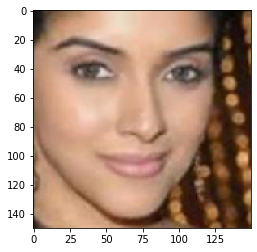

1.0


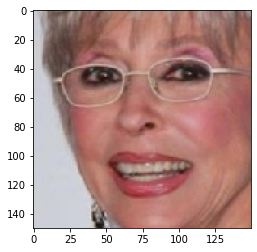

0.9999379


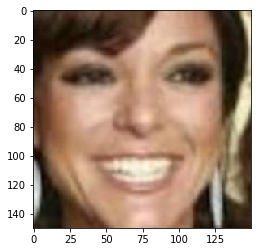

0.9997789


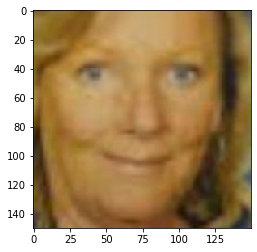

0.99996865


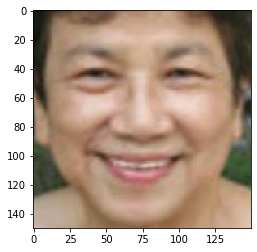

0.4916596


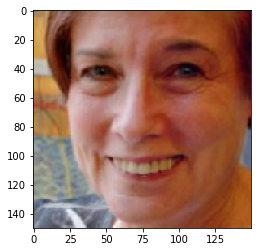

1.0


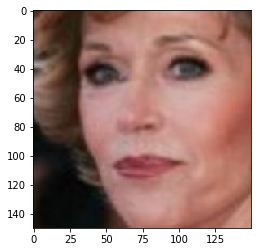

1.0


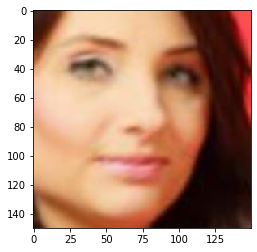

1.0


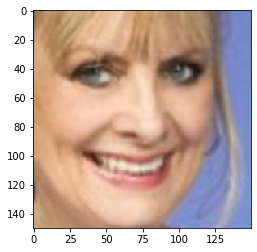

1.0


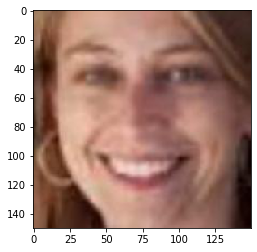

1.0


In [73]:
for i in test.loc[test["Gender"] == "1"].head(10).values:
  imgpred = tf.keras.preprocessing.image.load_img(i[3],target_size=(150,150))
  plt.imshow(imgpred)
  plt.show()
  imgpred = tf.keras.preprocessing.image.img_to_array(imgpred)
  imgpred = np.expand_dims(imgpred, axis=0)
  print(model.predict(imgpred)[0][0])

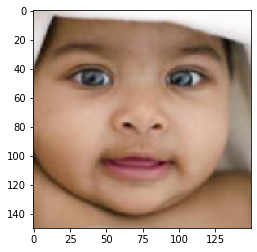

0


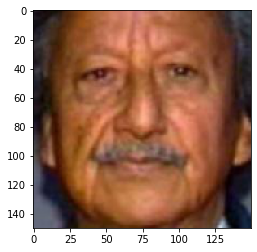

0


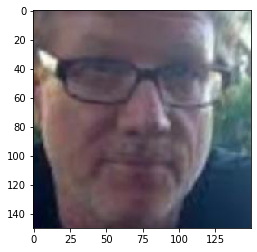

0


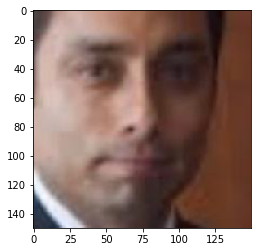

0


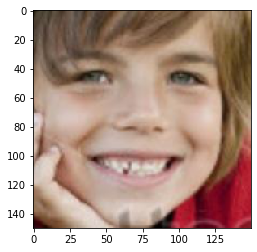

0


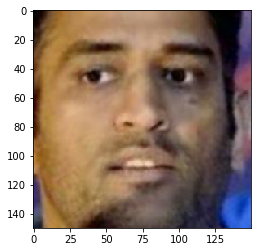

0


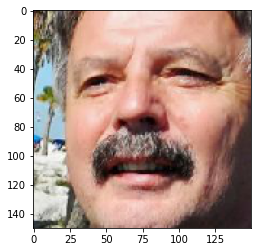

0


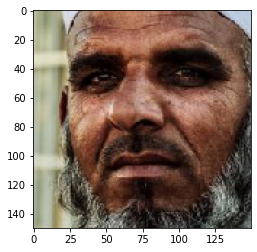

0


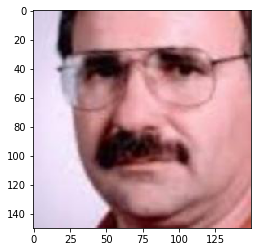

0


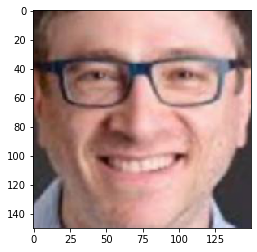

0


In [75]:
for i in test.loc[test["Gender"] == "0"].head(10).values:
  imgpred = tf.keras.preprocessing.image.load_img(i[3],target_size=(150,150))
  plt.imshow(imgpred)
  plt.show()
  imgpred = tf.keras.preprocessing.image.img_to_array(imgpred)
  imgpred = np.expand_dims(imgpred, axis=0)
  print(model.predict(imgpred)[0][0].argmax())